In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("preprocessed data.xlsx")

In [4]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade
0,0,2,1,60,3
1,0,1,1,55,2
2,0,1,1,33,3
3,0,1,1,67,2
4,0,1,1,47,2
...,...,...,...,...,...
229,1,2,2,55,2
230,1,3,2,45,2
231,1,3,2,37,3
232,1,3,2,58,2


In [6]:
from pycaret.anomaly import *
#intialize the setup
exp_ano = setup(df)


Setup Succesfully Completed!


,Description,Value
0,session_id,2616
1,Original Data,"(234, 5)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(234, 13)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [7]:
knn = create_model('knn')

In [9]:
knn_df = assign_model(knn)
knn_df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
0,0,2,1,60,3,0,1.414214
1,0,1,1,55,2,0,2.000000
2,0,1,1,33,3,0,2.449490
3,0,1,1,67,2,0,2.236068
4,0,1,1,47,2,0,1.732051
...,...,...,...,...,...,...,...
229,1,2,2,55,2,0,2.236068
230,1,3,2,45,2,0,2.236068
231,1,3,2,37,3,0,2.236068
232,1,3,2,58,2,0,2.449490


In [10]:
plot_model(knn)

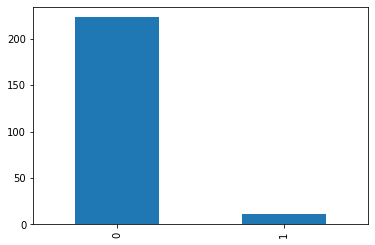

In [12]:
knn_df['Label'].value_counts().plot.bar()

In [13]:
knn_df['Label'].value_counts()

0    223
1     11
Name: Label, dtype: int64

In [15]:
df = knn_df.loc[knn_df['Label'] == 0] 

In [16]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
0,0,2,1,60,3,0,1.414214
1,0,1,1,55,2,0,2.000000
2,0,1,1,33,3,0,2.449490
3,0,1,1,67,2,0,2.236068
4,0,1,1,47,2,0,1.732051
...,...,...,...,...,...,...,...
229,1,2,2,55,2,0,2.236068
230,1,3,2,45,2,0,2.236068
231,1,3,2,37,3,0,2.236068
232,1,3,2,58,2,0,2.449490


In [17]:
raw = knn_df.loc[knn_df['Label'] == 1] 

In [18]:
raw

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
7,0,1,1,26,2,1,2.828427
25,0,2,0,30,2,1,2.828427
71,0,2,0,25,3,1,3.316625
76,0,1,1,72,2,1,4.242641
117,0,2,1,29,3,1,3.000000
147,0,2,1,25,3,1,3.000000
149,0,2,1,28,3,1,2.828427
171,0,2,2,30,2,1,2.828427
174,0,3,1,70,3,1,3.162278
190,0,2,3,73,3,1,5.196152


In [19]:
df = df.drop(["Label"],axis=1)

In [20]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Score
0,0,2,1,60,3,1.414214
1,0,1,1,55,2,2.000000
2,0,1,1,33,3,2.449490
3,0,1,1,67,2,2.236068
4,0,1,1,47,2,1.732051
...,...,...,...,...,...,...
229,1,2,2,55,2,2.236068
230,1,3,2,45,2,2.236068
231,1,3,2,37,3,2.236068
232,1,3,2,58,2,2.449490


0    223
1     11
Name: Label, dtype: int64

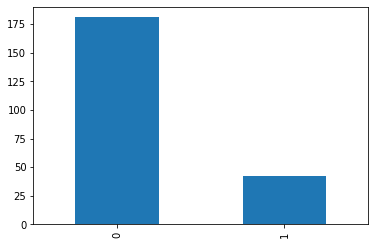

In [22]:
df['target'].value_counts().plot.bar()
knn_df['Label'].value_counts()


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_res = df.iloc[:,1:].values
y_res = df.iloc[:,0].values

In [25]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [26]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [27]:
X_res.shape

(362, 5)

In [28]:
y_res.shape

(362,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import Normalizer

In [32]:
scaler = Normalizer().fit(X_train)
standarized_x = scaler.transform(X_train)
standarized_x_test = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
model = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=50,
    min_samples_split=7,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=4818,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,)

In [36]:
model.fit(standarized_x,y_train)
y_pred = model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8493150684931506
[[29 11]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.75      1.00      0.86        33

    accuracy                           0.85        73
   macro avg       0.88      0.86      0.85        73
weighted avg       0.89      0.85      0.85        73



In [37]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=50,
              min_child_weight=2, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2837,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)


In [38]:
xgb_model.fit(standarized_x,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=50,
              min_child_weight=2, missing=None, n_estimators=400, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2837,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

In [39]:
y_pred = xgb_model.predict(standarized_x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9041095890410958
[[33  7]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.82      1.00      0.90        33

    accuracy                           0.90        73
   macro avg       0.91      0.91      0.90        73
weighted avg       0.92      0.90      0.90        73

